In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/content/Placement_Data_Full_Class.csv")

In [3]:

data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
data.shape

(215, 15)

In [5]:
data = data.iloc[:,1:]

In [6]:
data.drop(['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','salary'], axis = 1,inplace=True)

In [7]:
data

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status
0,67.00,91.00,58.00,55.0,58.80,Placed
1,79.33,78.33,77.48,86.5,66.28,Placed
2,65.00,68.00,64.00,75.0,57.80,Placed
3,56.00,52.00,52.00,66.0,59.43,Not Placed
4,85.80,73.60,73.30,96.8,55.50,Placed
...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,Placed
211,58.00,60.00,72.00,74.0,53.62,Placed
212,67.00,67.00,73.00,59.0,69.72,Placed
213,74.00,66.00,58.00,70.0,60.23,Placed


In [8]:
print(data['status'].unique())

['Placed' 'Not Placed']


In [9]:
data['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ssc_p     215 non-null    float64
 1   hsc_p     215 non-null    float64
 2   degree_p  215 non-null    float64
 3   etest_p   215 non-null    float64
 4   mba_p     215 non-null    float64
 5   status    215 non-null    object 
dtypes: float64(5), object(1)
memory usage: 10.2+ KB


In [11]:
data['status'].replace(['Not Placed', 'Placed'],[0, 1], inplace=True)

In [12]:
#one_hot_encoded=pd.get_dummies(data, columns = ['status'],drop_first=True)

In [13]:
data

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status
0,67.00,91.00,58.00,55.0,58.80,1
1,79.33,78.33,77.48,86.5,66.28,1
2,65.00,68.00,64.00,75.0,57.80,1
3,56.00,52.00,52.00,66.0,59.43,0
4,85.80,73.60,73.30,96.8,55.50,1
...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,1
211,58.00,60.00,72.00,74.0,53.62,1
212,67.00,67.00,73.00,59.0,69.72,1
213,74.00,66.00,58.00,70.0,60.23,1


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ssc_p     215 non-null    float64
 1   hsc_p     215 non-null    float64
 2   degree_p  215 non-null    float64
 3   etest_p   215 non-null    float64
 4   mba_p     215 non-null    float64
 5   status    215 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 10.2 KB


#Steps

# 0. Preprocess  EDA + Feature Selection
# 1. Extrect imput and output columns
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/ Model selection
# 6. Deploy the model

In [15]:
import matplotlib.pyplot as plt

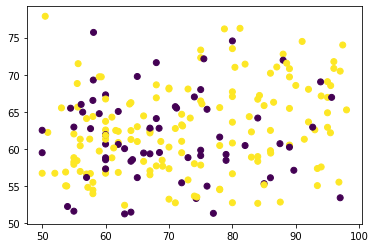

In [16]:
plt.scatter(data['etest_p'],data['mba_p'], c=data['status'])

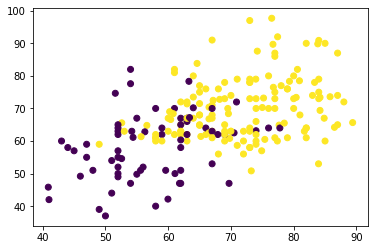

In [17]:
plt.scatter(data['ssc_p'],data['hsc_p'], c=data['status'])

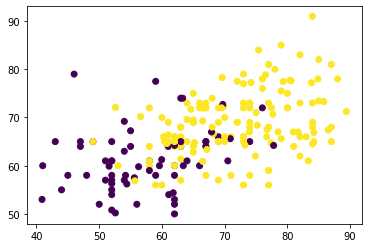

In [18]:
plt.scatter(data['ssc_p'],data['degree_p'], c=data['status'])

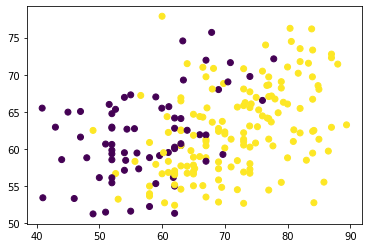

In [19]:
plt.scatter(data['ssc_p'],data['mba_p'], c=data['status'])

In [20]:
data.drop(['hsc_p','etest_p','degree_p'], axis = 1,inplace=True)

In [21]:
data

,ssc_p,mba_p,status
0,67.00,58.80,1
1,79.33,66.28,1
2,65.00,57.80,1
3,56.00,59.43,0
4,85.80,55.50,1
...,...,...,...
210,80.60,74.49,1
211,58.00,53.62,1
212,67.00,69.72,1
213,74.00,60.23,1


In [25]:
X = data.iloc[:,0:2]
Y = data.iloc[:,-1]

In [26]:
X.shape

(215, 2)

In [27]:
Y.shape

(215,)

Train test split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [30]:
Y_test.shape

(43,)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
X_train = scaler.fit_transform(X_train)

In [34]:
X_train

array([[ 1.11521438e+00,  4.42225431e-01],
       [ 3.13701133e-02, -7.04725438e-02],
       [-1.38233979e+00, -2.89955289e-01],
       [ 1.04924125e+00,  1.69053354e+00],
       [-4.39866523e-01, -9.00391673e-01],
       [-8.16855831e-01, -1.72688138e+00],
       [-6.32131070e-01,  5.48537385e-01],
       [-9.48802089e-01,  8.43467323e-01],
       [ 5.96854076e-01, -2.07459844e-02],
       [-4.39866523e-01, -3.53399520e-01],
       [-5.90662246e-01, -1.64114594e+00],
       [ 8.79596058e-01,  3.70207655e-01],
       [-2.42942760e+00,  5.50252094e-01],
       [ 5.02606749e-01, -6.65476547e-01],
       [-1.57124541e-01, -5.84885227e-01],
       [ 1.34329291e+00, -2.21366931e-01],
       [-1.75932910e+00, -5.98602899e-01],
       [-1.94782376e+00, -1.54169282e+00],
       [-3.17344997e-01,  2.10549311e+00],
       [ 5.96854076e-01,  9.92647002e-01],
       [ 5.96854076e-01,  1.46247725e+00],
       [ 4.64496856e-02,  5.55396221e-01],
       [ 2.85837897e-01, -5.21440996e-01],
       [-1.

In [35]:
X_test = scaler.transform(X_test)

In [36]:
X_test

array([[-0.25137187,  0.03755412],
       [ 1.63357467,  0.75601717],
       [ 1.91631666,  0.10614248],
       [ 0.87959606,  0.72858182],
       [ 0.59685408, -1.6531489 ],
       [-1.38233979,  0.1112866 ],
       [-1.38233979, -0.64490004],
       [ 1.62980478,  1.27385927],
       [ 0.6911014 , -0.86438278],
       [ 0.40835942, -0.81122681],
       [-1.38233979, -1.06157431],
       [ 2.14251024,  0.16272787],
       [ 0.03137011, -1.50739864],
       [-0.3456192 ,  0.03069528],
       [ 0.97384338,  1.27214456],
       [ 0.82304766,  0.50909908],
       [-0.7226085 ,  0.80917314],
       [-0.43986652, -0.99298596],
       [ 0.87959606,  1.40589186],
       [-0.15712454, -0.97412416],
       [-0.06287721, -0.57116756],
       [ 1.44508002,  1.62708931],
       [-0.15712454, -1.24676288],
       [ 0.6911014 , -0.95697707],
       [-0.43986652, -0.3876937 ],
       [ 1.727822  , -0.16992566],
       [-0.43986652,  0.08385126],
       [ 0.03137011, -0.59688819],
       [-0.7226085 ,

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
clf = LogisticRegression()

Model traning

In [39]:
clf.fit(X_train,Y_train)

LogisticRegression()

In [40]:
y_pred=clf.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score 

In [42]:
accuracy_score(Y_test,y_pred)

0.8372093023255814

In [43]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


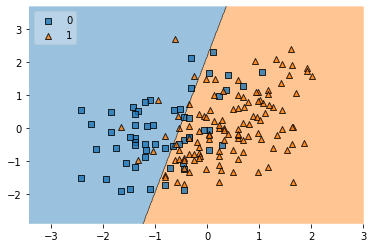

In [45]:
plot_decision_regions(X_train,Y_train.values,clf=clf,legend=2)

In [46]:
import pickle

In [47]:
pickle.dump(clf,open('model.pkl','wb'))